In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


# Read the sheets 

In [65]:

# read the excel sheet containing category summaries for image metrics and inflammatory metrics
df2 = pd.read_excel("/Documents/GitHub/Minimal-Lung-Model/Image_Analysis/category_summary.xlsx")

# read the excel sheet that contains the results of the optimization algorithm
df1 = pd.read_excel("/Documents/GitHub/Minimal-Lung-Model/Image_Analysis/optimized.xlsx")

In [ ]:

# split the group column in image metrics sheet to match the optimization sheet
df= df2["group"].str.split("-", n = 1, expand = True)

# to be consistent with all labels, change 'Dx' to x where x = 0 or x = 7
df["day"] = df.iloc[:,0].apply(lambda x: int(x[1]))

In [ ]:

# update the day and group columns in df2 to make them similar to df1
df2["day"] = df.iloc[:,2]
df2["group"] = df.iloc[:,1]

In [ ]:

# set the index for the two dataframes:
df2_temp.set_index(["day","group"])
df1.set_index(["day","group"])

In [ ]:

# make sure the day and group are correct data types for the merge
df2["day"] = df2["day"].astype("category") 
df1["day"] = df1["day"].astype("category")
df2["group"] = df2["group"].astype("category")
df1["group"] = df1["group"].astype("category")

# merge the results of the optimization algorithm table and image metrics and inflammatory metrics table
result2 = pd.merge(df2_temp, df1, on=["day","group"])

In [ ]:

# save the sheet
result2.to_excel("category_summary_all_wupdated_Ttilde.xlsx")

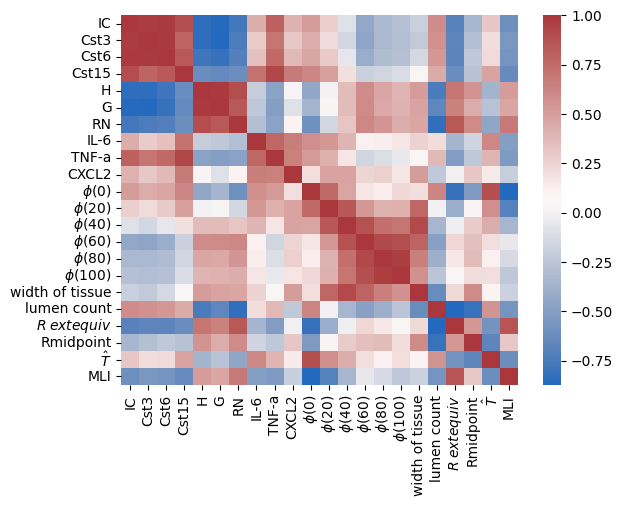

In [14]:
# create a heat map of the correlations
sns.color_palette("vlag", as_cmap=True)
sns.heatmap(df.iloc[:,1:23].corr(),yticklabels=['IC', 'Cst3', 'Cst6','Cst15','H','G','RN', 'IL-6', 'TNF-a',
       'CXCL2', '$\phi(0)$', '$\phi(20)$', '$\phi(40)$', '$\phi(60)$', '$\phi(80)$',
       '$\phi(100)$', 'width of tissue', 'lumen count', '$R_\text{equiv}$', 'Rmidpoint',
       '$\hat{T}$', 'MLI'], xticklabels=['IC', 'Cst3', 'Cst6','Cst15','H','G','RN', 'IL-6', 'TNF-a',
       'CXCL2', '$\phi(0)$', '$\phi(20)$', '$\phi(40)$', '$\phi(60)$', '$\phi(80)$',
       '$\phi(100)$', 'width of tissue', 'lumen count', '$R_\text{equiv}$', 'Rmidpoint',
       '$\hat{T}$', 'MLI'], cmap = "vlag") 
sns.color_palette("vlag", as_cmap=True)
plt.show()
# save the figure as a pdf // eps for some reason crops improperly
# plt.savefig('category_corr_map.pdf')

In [2]:
df3 = pd.read_excel("/Users/tfai/Documents/GitHub/Minimal-Lung-Model/Image_Analysis/cat_sum_inf_opt.xlsx")

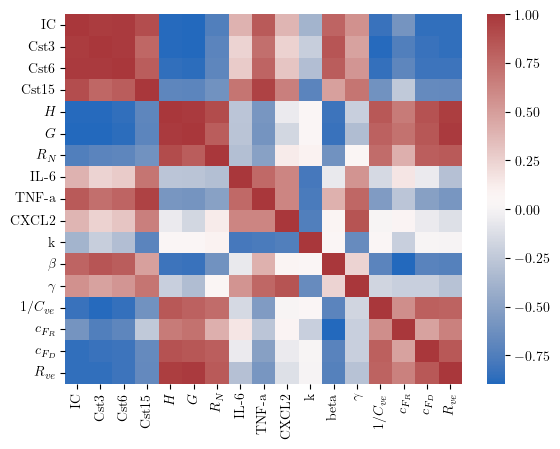

In [25]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif', weight = 'heavy')
sns.heatmap(df3.iloc[:,3:21].corr(), cmap = "vlag",yticklabels=['IC', 'Cst3', 'Cst6', 'Cst15', '$H$',
       '$G$', '$R_N$', 'IL-6', 'TNF-a', 'CXCL2', 'k', r'$\beta$', '$\gamma$ ', '$1/C_{ve}$',
       '$c_{F_R}$', '$c_{F_D}$', '$R_{ve}$'], xticklabels=['IC', 'Cst3', 'Cst6', 'Cst15', '$H$',
       '$G$', '$R_N$', 'IL-6', 'TNF-a', 'CXCL2', 'k', 'beta', '$\gamma$ ', '$1/C_{ve}$',
       '$c_{F_R}$', '$c_{F_D}$', '$R_{ve}$']) 

plt.savefig('optimized_corr_map.pdf')

In [54]:
df4.corr()

,IC,Cst3,Cst6,beta,H,G,RN,1/C_ve,c_F_R,c_F_D,R_ve,k,Cst15,gamma,IL-6,TNF-a,CXCL2
IC,1.000000,0.971000,0.979407,0.778610,-0.882975,-0.891379,-0.743577,-0.836268,-0.599260,-0.854628,-0.855540,-0.381903,0.890902,0.558120,0.397594,0.832494,0.381289
Cst3,0.971000,1.000000,0.984950,0.858220,-0.884485,-0.895013,-0.709317,-0.884777,-0.743700,-0.835716,-0.853385,-0.222033,0.765775,0.476262,0.238014,0.727000,0.249884
Cst6,0.979407,0.984950,1.000000,0.822240,-0.854327,-0.867477,-0.692152,-0.847033,-0.692713,-0.820328,-0.821900,-0.317843,0.819929,0.536092,0.278585,0.778779,0.309031
beta,0.778610,0.858220,0.822240,1.000000,-0.821862,-0.833481,-0.608615,-0.705159,-0.896018,-0.714296,-0.729869,0.043238,0.488713,0.242327,-0.063927,0.406139,0.068363
H,-0.882975,-0.884485,-0.854327,-0.821862,1.000000,0.982145,0.896904,0.844259,0.670163,0.869278,0.963604,0.040904,-0.690985,-0.211890,-0.273689,-0.583727,-0.057855
G,-0.891379,-0.895013,-0.867477,-0.833481,0.982145,1.000000,0.822148,0.794923,0.713357,0.845677,0.981277,0.045643,-0.702955,-0.323869,-0.279671,-0.595195,-0.165366
RN,-0.743577,-0.709317,-0.692152,-0.608615,0.896904,0.822148,1.000000,0.743942,0.412158,0.809141,0.832053,0.094474,-0.614323,0.056202,-0.308239,-0.510149,0.133066
1/C_ve,-0.836268,-0.884777,-0.847033,-0.705159,0.844259,0.794923,0.743942,1.000000,0.575527,0.802815,0.785285,0.037594,-0.609800,-0.173261,-0.149994,-0.546801,0.014358
c_F_R,-0.599260,-0.743700,-0.692713,-0.896018,0.670163,0.713357,0.412158,0.575527,1.000000,0.478104,0.640708,-0.211520,-0.246079,-0.213857,0.158305,-0.266620,0.074673
c_F_D,-0.854628,-0.835716,-0.820328,-0.714296,0.869278,0.845677,0.809141,0.802815,0.478104,1.000000,0.843656,0.008047,-0.662067,-0.209155,-0.055108,-0.515022,-0.051757


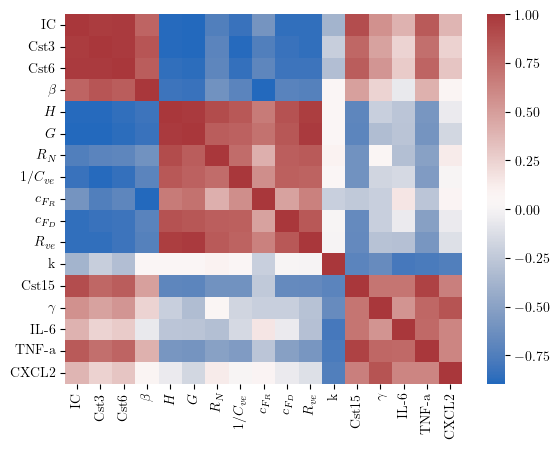

In [57]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif', weight = 'heavy')
sns.heatmap(df4.corr(), cmap = "vlag",yticklabels=['IC', 'Cst3', 'Cst6', r'$\beta$', '$H$',
       '$G$', '$R_N$',  '$1/C_{ve}$',
       '$c_{F_R}$', '$c_{F_D}$', '$R_{ve}$', 'k', 'Cst15', '$\gamma$ ', 'IL-6', 'TNF-a', 'CXCL2']
            , xticklabels=['IC', 'Cst3', 'Cst6', r'$\beta$', '$H$',
       '$G$', '$R_N$',  '$1/C_{ve}$',
       '$c_{F_R}$', '$c_{F_D}$', '$R_{ve}$', 'k', 'Cst15', '$\gamma$ ', 'IL-6', 'TNF-a', 'CXCL2']) 
plt.savefig('optimized_corr_map.pdf')

In [69]:
# first bring the day column to the front

# merge the two dataframes 
opt_mand = pd.merge(df1, df2[], on=["day","group"])


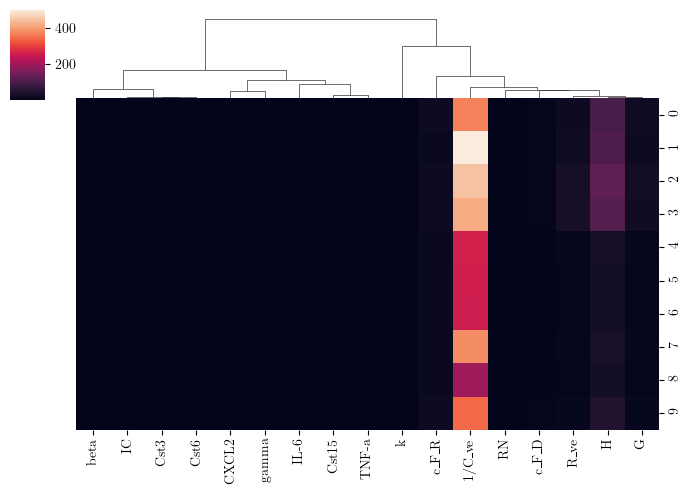

In [41]:
sns.clustermap(df4,metric="correlation", figsize=(7, 5),
    row_cluster=False,
    dendrogram_ratio=(.1, .2))

In [30]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   day            10 non-null     int64  
 1   num_optimized  10 non-null     int64  
 2   group          10 non-null     object 
 3   IC             10 non-null     float64
 4   Cst3           10 non-null     float64
 5   Cst6           10 non-null     float64
 6   Cst15          10 non-null     float64
 7   H              10 non-null     float64
 8   G              10 non-null     float64
 9   RN             10 non-null     float64
 10  IL-6           10 non-null     float64
 11  TNF-a          10 non-null     float64
 12  CXCL2          10 non-null     float64
 13  k              10 non-null     float64
 14  beta           10 non-null     float64
 15  gamma          10 non-null     float64
 16  1/C_ve         10 non-null     float64
 17  c_F_R          10 non-null     float64
 18  c_F_D        

In [50]:
df4 = df3.iloc[:,3:6]

In [51]:
df4 = df4.join(df3.iloc[:,14])
df4 = df4.join(df3.iloc[:,7:10])

df4 = df4.join(df3.iloc[:,16:20])
df4 = df4.join(df3.iloc[:,13])
df4 = df4.join(df3.iloc[:,6])
df4 = df4.join(df3.iloc[:,15])
df4 = df4.join(df3.iloc[:,10:13])


In [52]:
df4.columns


Index(['IC', 'Cst3', 'Cst6', 'beta', 'H', 'G', 'RN', '1/C_ve', 'c_F_R',
       'c_F_D', 'R_ve', 'k', 'Cst15', 'gamma ', 'IL-6', 'TNF-a', 'CXCL2'],
      dtype='object')